    Jacob Knopping
    1/8/2020
    
    17.6 CHALLENGE: Sentiment analysis with Naive bayes

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [2]:
# Grab and process the raw data.
#Choosing amazon to start
data_path = ("amazon_cells_labelled.txt")

sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
#1 is positive, 0 is negative
sms_raw.columns = ['message', 'positive']

In [3]:
#Find all positive messages
print(sms_raw.loc[sms_raw.positive == 1].count())
sms_raw.loc[sms_raw.positive == 1]

message     500
positive    500
dtype: int64


,message,positive
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


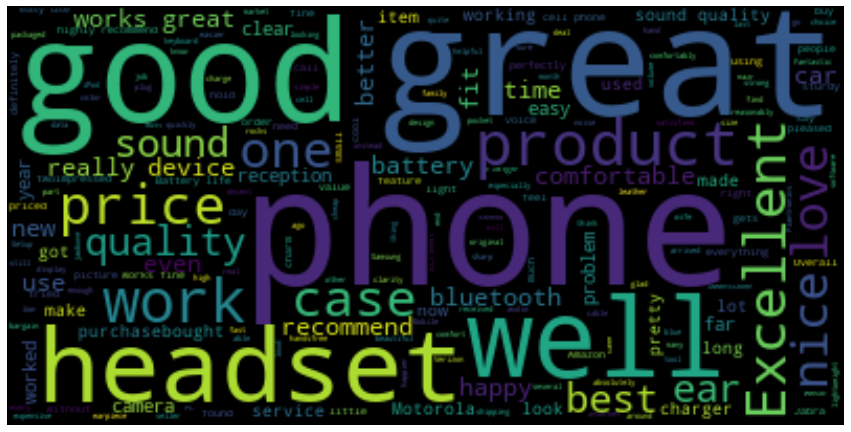

In [4]:
#Create wordcloud of postive reviews
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='black').generate(" ".join(sms_raw.loc[sms_raw.positive == 1].message))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

#sms_raw.loc[sms_raw.positive == 1]

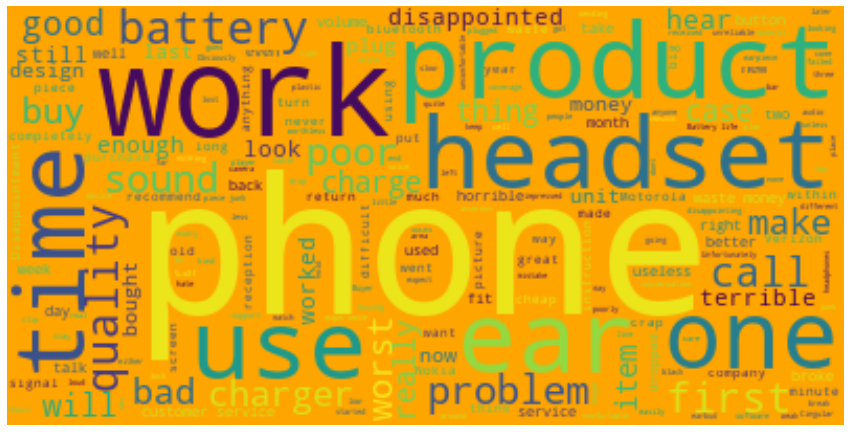

In [10]:
#Create wordcloud of negative reviews
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='orange').generate(" ".join(sms_raw.loc[sms_raw.positive == 0].message))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [6]:
#use keywords obtained from wordcloud that are found mostly with posistive reviews
keywords = ['great',
            'good',
            'well',
            'excellent',
            'best',
            'love',
            'happy',
            'nice',
            'quality',
            'sturdy',
            'worked',
            'clear',
            'comfortable']

for key in keywords:
    sms_raw[str(key)] = sms_raw.message.str.contains(" " + str(key) + " ", case=True)
    sms_raw[str(key)] = sms_raw.message.str.contains(str(key) + " ", case=True)
    sms_raw[str(key)] = sms_raw.message.str.contains(str(key) + ".", case=True)
    

In [7]:
sms_raw['positive'] = (sms_raw['positive'] == 1)

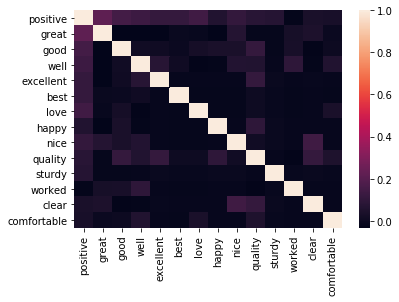

In [8]:
sns.heatmap(sms_raw.corr())

In [9]:
data = sms_raw[keywords]

target = sms_raw['positive']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

#Display our results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

percent_acc = 100 - (100*((target != y_pred).sum())/data.shape[0])
print('% Accurancy: {}'.format(percent_acc))

Number of mislabeled points out of a total 1000 points : 334
% Accurancy: 66.6
